# Lead Score - Case Study

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
# Loading the data using Pandas
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [8]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# Checking the percentage of missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [12]:
# Rechecking the percentage of missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [13]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
# Rechecking the percentage of missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
df2["Country"].value_counts()

Country
India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
outside india    6779
not provided     2461
Name: count, dtype: int64

In [17]:
# Rechecking the percentage of missing values
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [19]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [21]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [20]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [21]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443


In [22]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis=1)
df_final.shape

(9074, 21)

## 2. EDA

#### 2.1.1. Categorical Variables

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [24]:
print(df_final['Lead Origin'].dtype)
print(df_final['Lead Origin'].unique())

object
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']


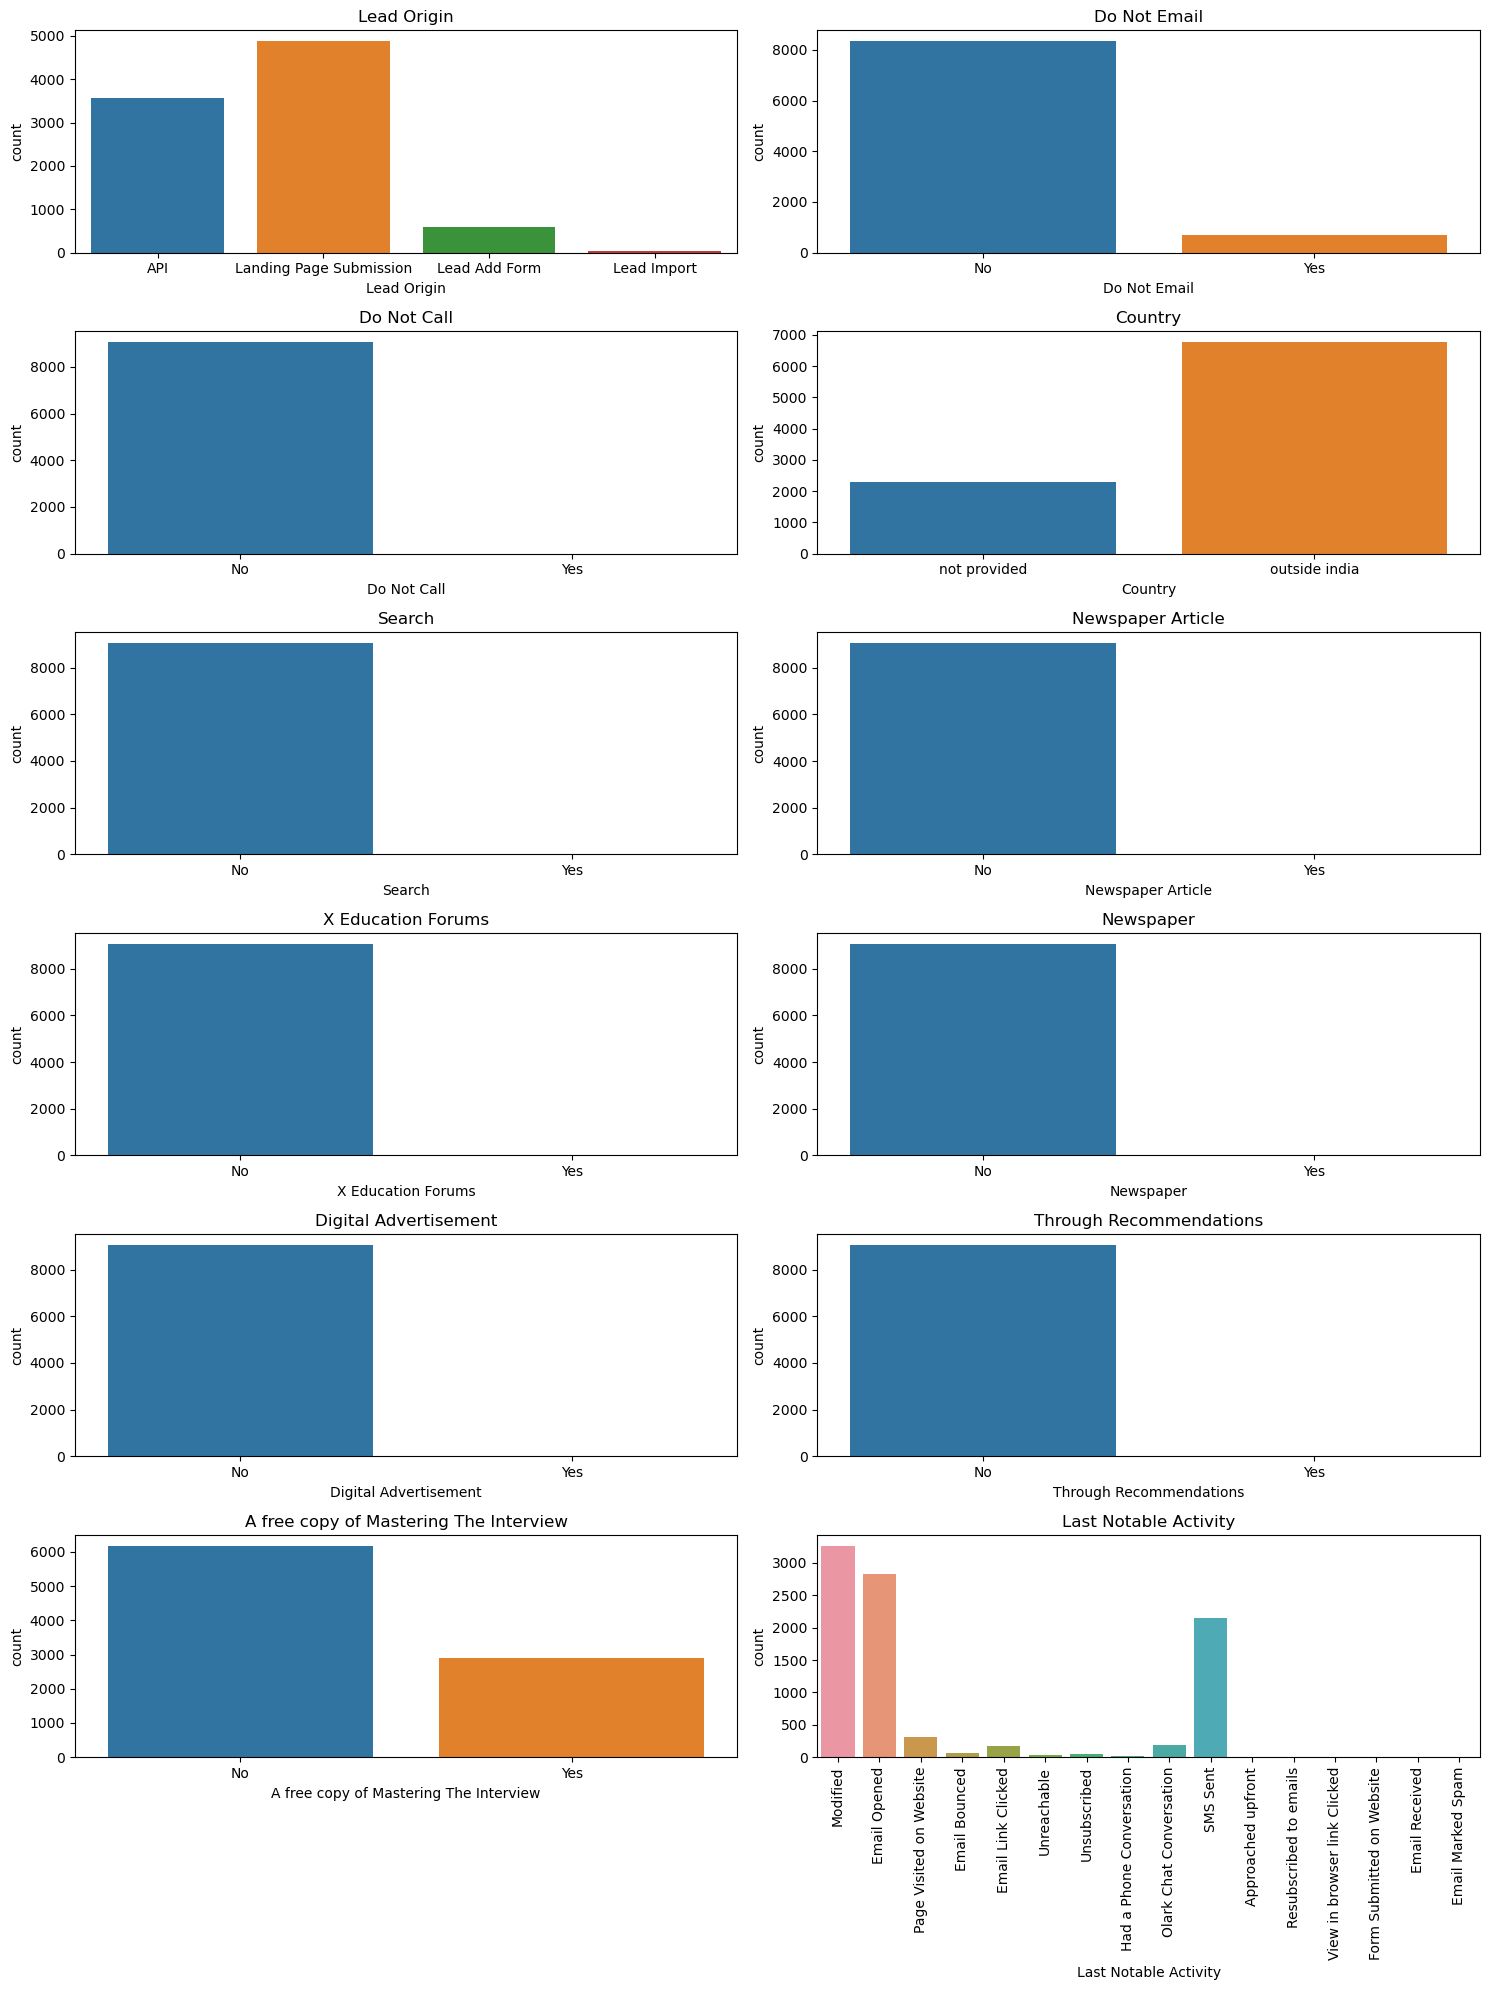

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is already loaded with your data

plt.figure(figsize=(15, 20))

# Subplot 1: Lead Origin
plt.subplot(6, 2, 1)
sns.countplot(data=df_final, x='Lead Origin')
plt.title('Lead Origin')

# Subplot 2: Do Not Email
plt.subplot(6, 2, 2)
sns.countplot(data=df_final, x='Do Not Email')
plt.title('Do Not Email')

# Subplot 3: Do Not Call
plt.subplot(6, 2, 3)
sns.countplot(data=df_final, x='Do Not Call')
plt.title('Do Not Call')

# Subplot 4: Country
plt.subplot(6, 2, 4)
sns.countplot(data=df_final, x='Country')
plt.title('Country')

# Subplot 5: Search
plt.subplot(6, 2, 5)
sns.countplot(data=df_final, x='Search')
plt.title('Search')

# Subplot 6: Newspaper Article
plt.subplot(6, 2, 6)
sns.countplot(data=df_final, x='Newspaper Article')
plt.title('Newspaper Article')

# Subplot 7: X Education Forums
plt.subplot(6, 2, 7)
sns.countplot(data=df_final, x='X Education Forums')
plt.title('X Education Forums')

# Subplot 8: Newspaper
plt.subplot(6, 2, 8)
sns.countplot(data=df_final, x='Newspaper')
plt.title('Newspaper')

# Subplot 9: Digital Advertisement
plt.subplot(6, 2, 9)
sns.countplot(data=df_final, x='Digital Advertisement')
plt.title('Digital Advertisement')

# Subplot 10: Through Recommendations
plt.subplot(6, 2, 10)
sns.countplot(data=df_final, x='Through Recommendations')
plt.title('Through Recommendations')

# Subplot 11: A free copy of Mastering The Interview
plt.subplot(6, 2, 11)
sns.countplot(data=df_final, x='A free copy of Mastering The Interview')
plt.title('A free copy of Mastering The Interview')

# Subplot 12: Last Notable Activity
plt.subplot(6, 2, 12)
sns.countplot(data=df_final, x='Last Notable Activity')
plt.title('Last Notable Activity')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability

plt.tight_layout()
plt.show()


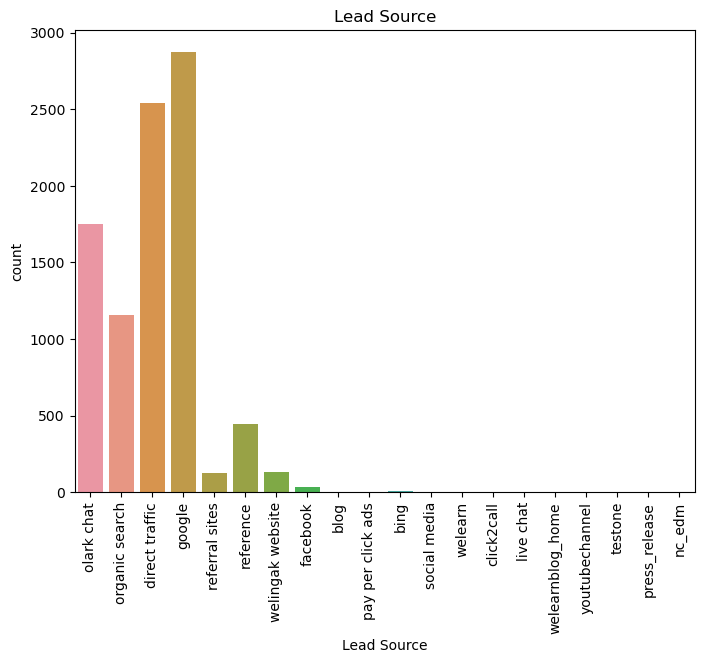

In [29]:
plt.figure(figsize=(8, 6))  

# Create the count plot
sns.countplot(data=df_final, x='Lead Source')
plt.xticks(rotation=90)
plt.title('Lead Source')
plt.show()


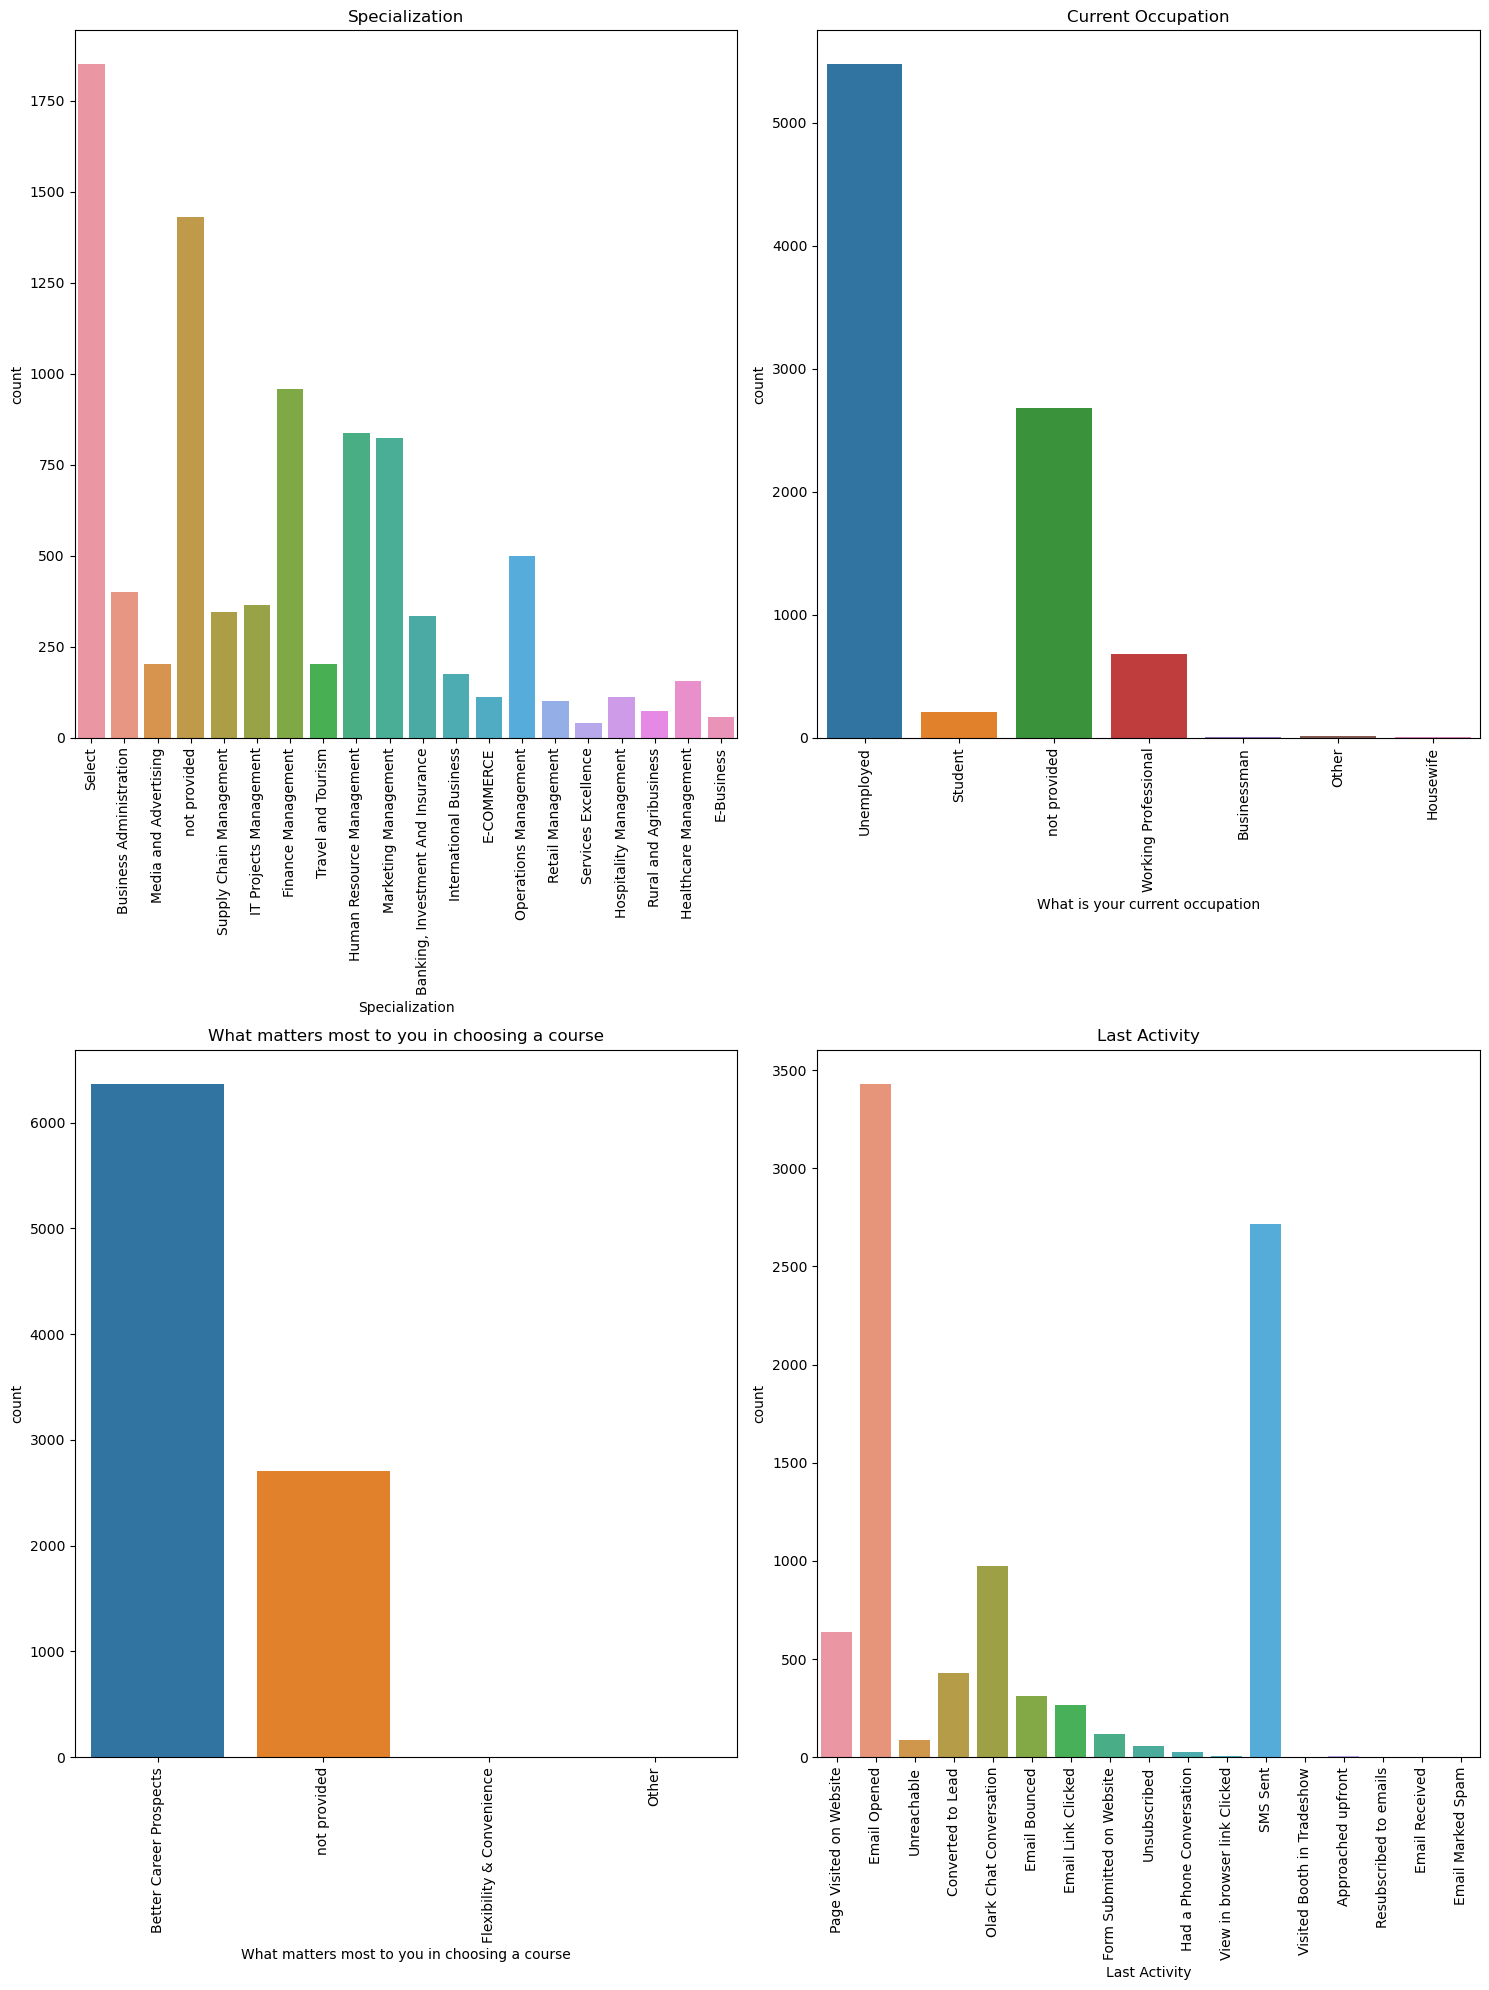

In [26]:
plt.figure(figsize=(15, 20)) 

# Subplot 1: Specialization
plt.subplot(2, 2, 1)
sns.countplot(data=df_final, x='Specialization')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Specialization')

# Subplot 2: Current Occupation
plt.subplot(2, 2, 2)
sns.countplot(data=df_final, x='What is your current occupation')
plt.xticks(rotation=90)
plt.title('Current Occupation')

# Subplot 3: What matters most in choosing a course
plt.subplot(2, 2, 3)
sns.countplot(data=df_final, x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.title('What matters most to you in choosing a course')

# Subplot 4: Last Activity
plt.subplot(2, 2, 4)
sns.countplot(data=df_final, x='Last Activity')
plt.xticks(rotation=90)
plt.title('Last Activity')

# Adjust layout and display plot
plt.tight_layout()
plt.show()

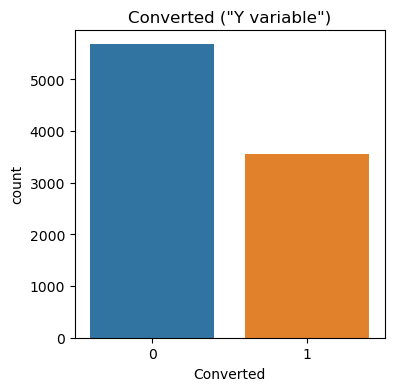

In [27]:
# Create the count plot for 'Converted'
plt.figure(figsize=(4, 4))  # Adjust figure size if needed
sns.countplot(data=df, x='Converted')

# Set title
plt.title('Converted ("Y variable")')

# Display plot
plt.show()

#### 2.1.1. Numerical Variables

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

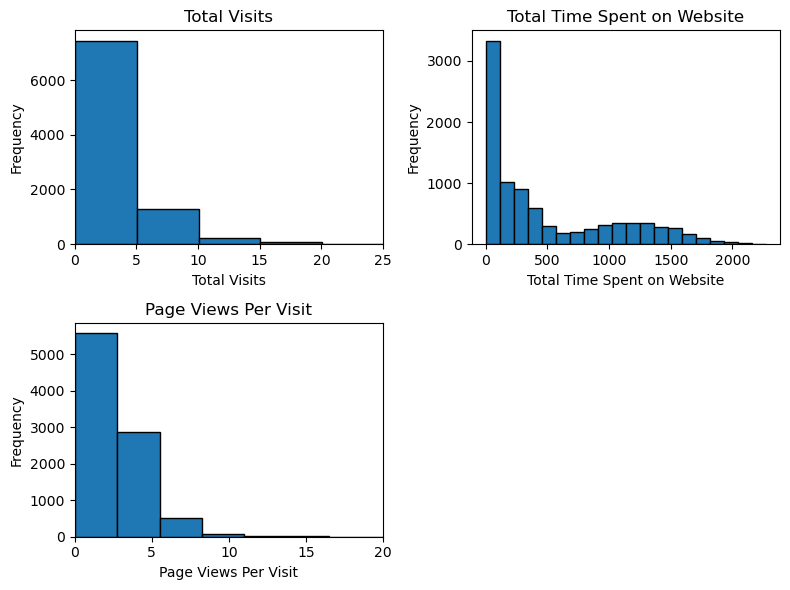

In [29]:
plt.figure(figsize=(8, 6))  

# Subplot 1: Total Visits
plt.subplot(2, 2, 1)
plt.hist(df_final['TotalVisits'], bins=50, edgecolor='black')  
plt.title('Total Visits')
plt.xlabel('Total Visits')
plt.ylabel('Frequency')
plt.xlim(0, 25) 

# Subplot 2: Total Time Spent on Website
plt.subplot(2, 2, 2)
plt.hist(df_final['Total Time Spent on Website'], bins=20, edgecolor='black')
plt.title('Total Time Spent on Website')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Frequency')

# Subplot 3: Page Views Per Visit
plt.subplot(2, 2, 3)
plt.hist(df_final['Page Views Per Visit'], bins=20, edgecolor='black')
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.ylabel('Frequency')
plt.xlim(0, 20)

# Subplot 4: Empty subplot placeholder for future use
plt.subplot(2, 2, 4)
plt.axis('off')  # Turn off axis for the empty subplot

plt.tight_layout()  # Adjust subplot layout for better appearance
plt.show()

### 2.1. Relating all the categorical variables to Converted

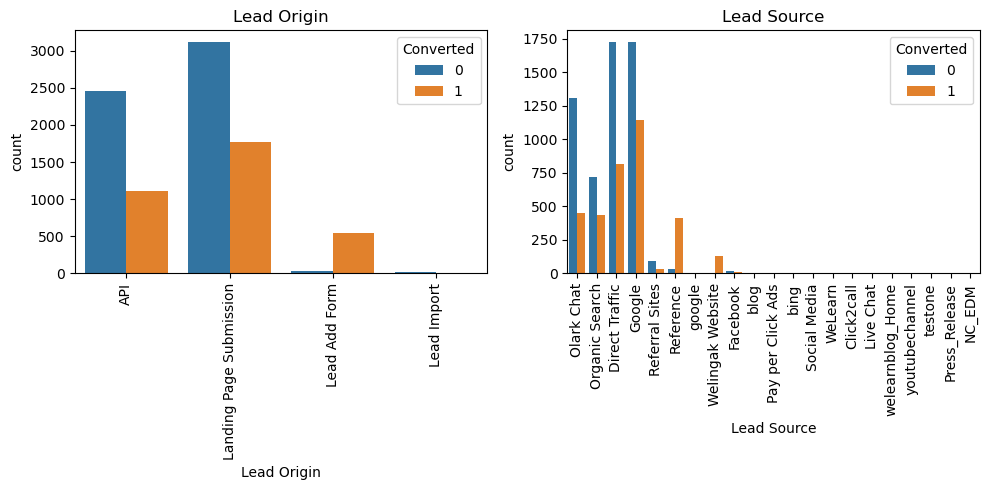

In [30]:
plt.figure(figsize=(10, 5))  

# Subplot 1: Lead Origin
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=df_final)
plt.title('Lead Origin')
plt.xticks(rotation=90)  
# Subplot 2: Lead Source
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=df_final)
plt.title('Lead Source')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

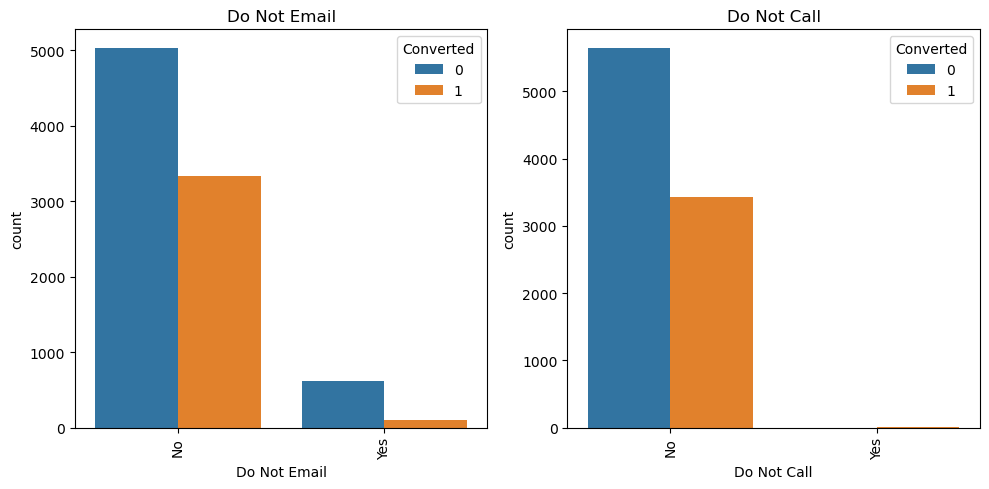

In [31]:
plt.figure(figsize=(10, 5))  

# Subplot 1: Do Not Email
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=df_final)
plt.title('Do Not Email')
plt.xticks(rotation=90)  

# Subplot 2: Do Not Call
plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', hue='Converted', data=df_final)
plt.title('Do Not Call')
plt.xticks(rotation=90)  

plt.tight_layout()  
plt.show()

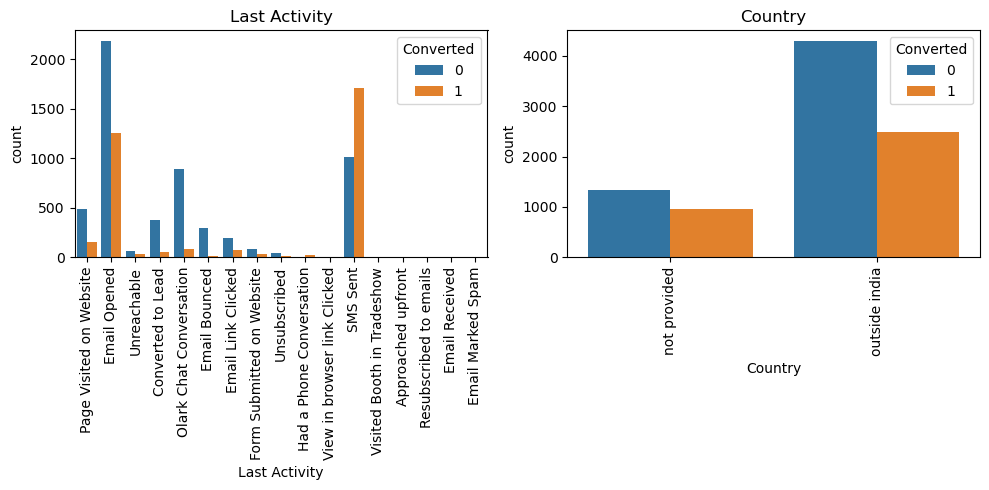

In [32]:
plt.figure(figsize=(10, 5))  

# Subplot 1: Last Activity
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Last Activity', hue='Converted', data=df_final)
plt.title('Last Activity')
plt.xticks(rotation=90)  

# Subplot 2: Country
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Country', hue='Converted', data=df_final)
plt.title('Country')
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

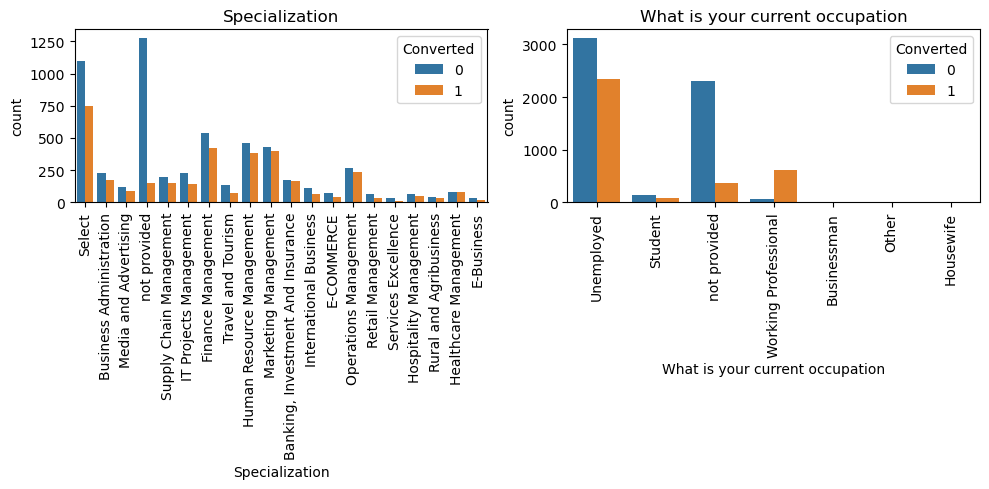

In [33]:
plt.figure(figsize=(10, 5))  

# Subplot 1: Specialization
plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', hue='Converted', data=df_final)
plt.title('Specialization')
plt.xticks(rotation=90)  

# Subplot 2: Current Occupation
plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', hue='Converted', data=df_final)
plt.title('What is your current occupation')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

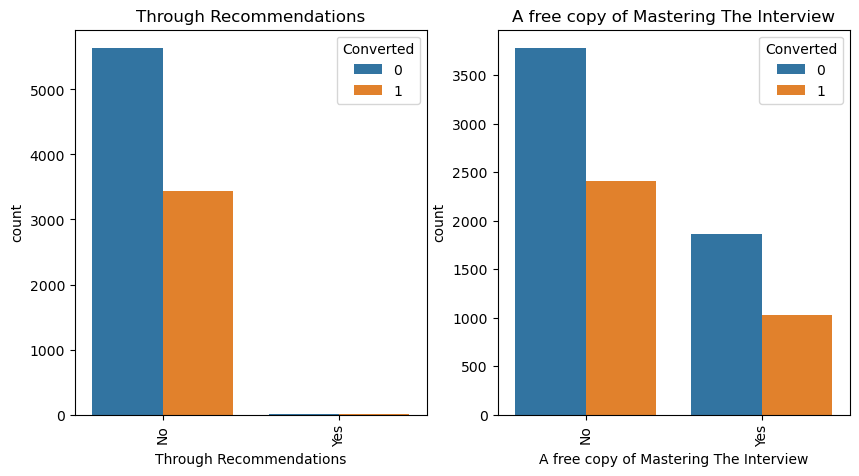

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

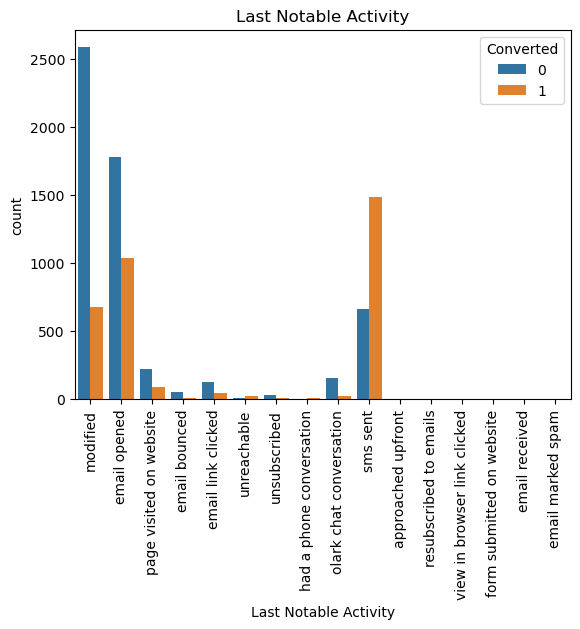

In [39]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

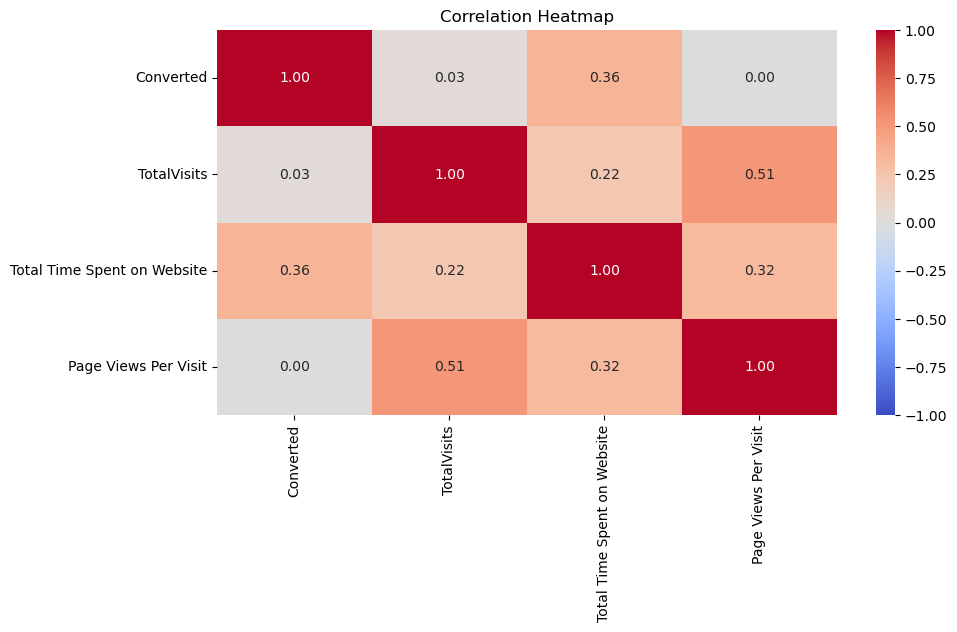

In [35]:
# Select numerical columns from df_final
numerical_columns = df_final.select_dtypes(include='number')

plt.figure(figsize=(10, 5))  # Set figure size

# Create heatmap of correlations
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')  # Set title for the plot

plt.show()

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [36]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [38]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,outside india,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,outside india,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,outside india,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,outside india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,outside india,...,False,False,False,False,False,False,True,False,False,False


In [40]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis= 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## 4. Test-Train Split

In [41]:
# Import the required library
from sklearn.model_selection import train_test_split

In [42]:
X = df_final_dum.drop(['Converted'],axis= 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [43]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [45]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


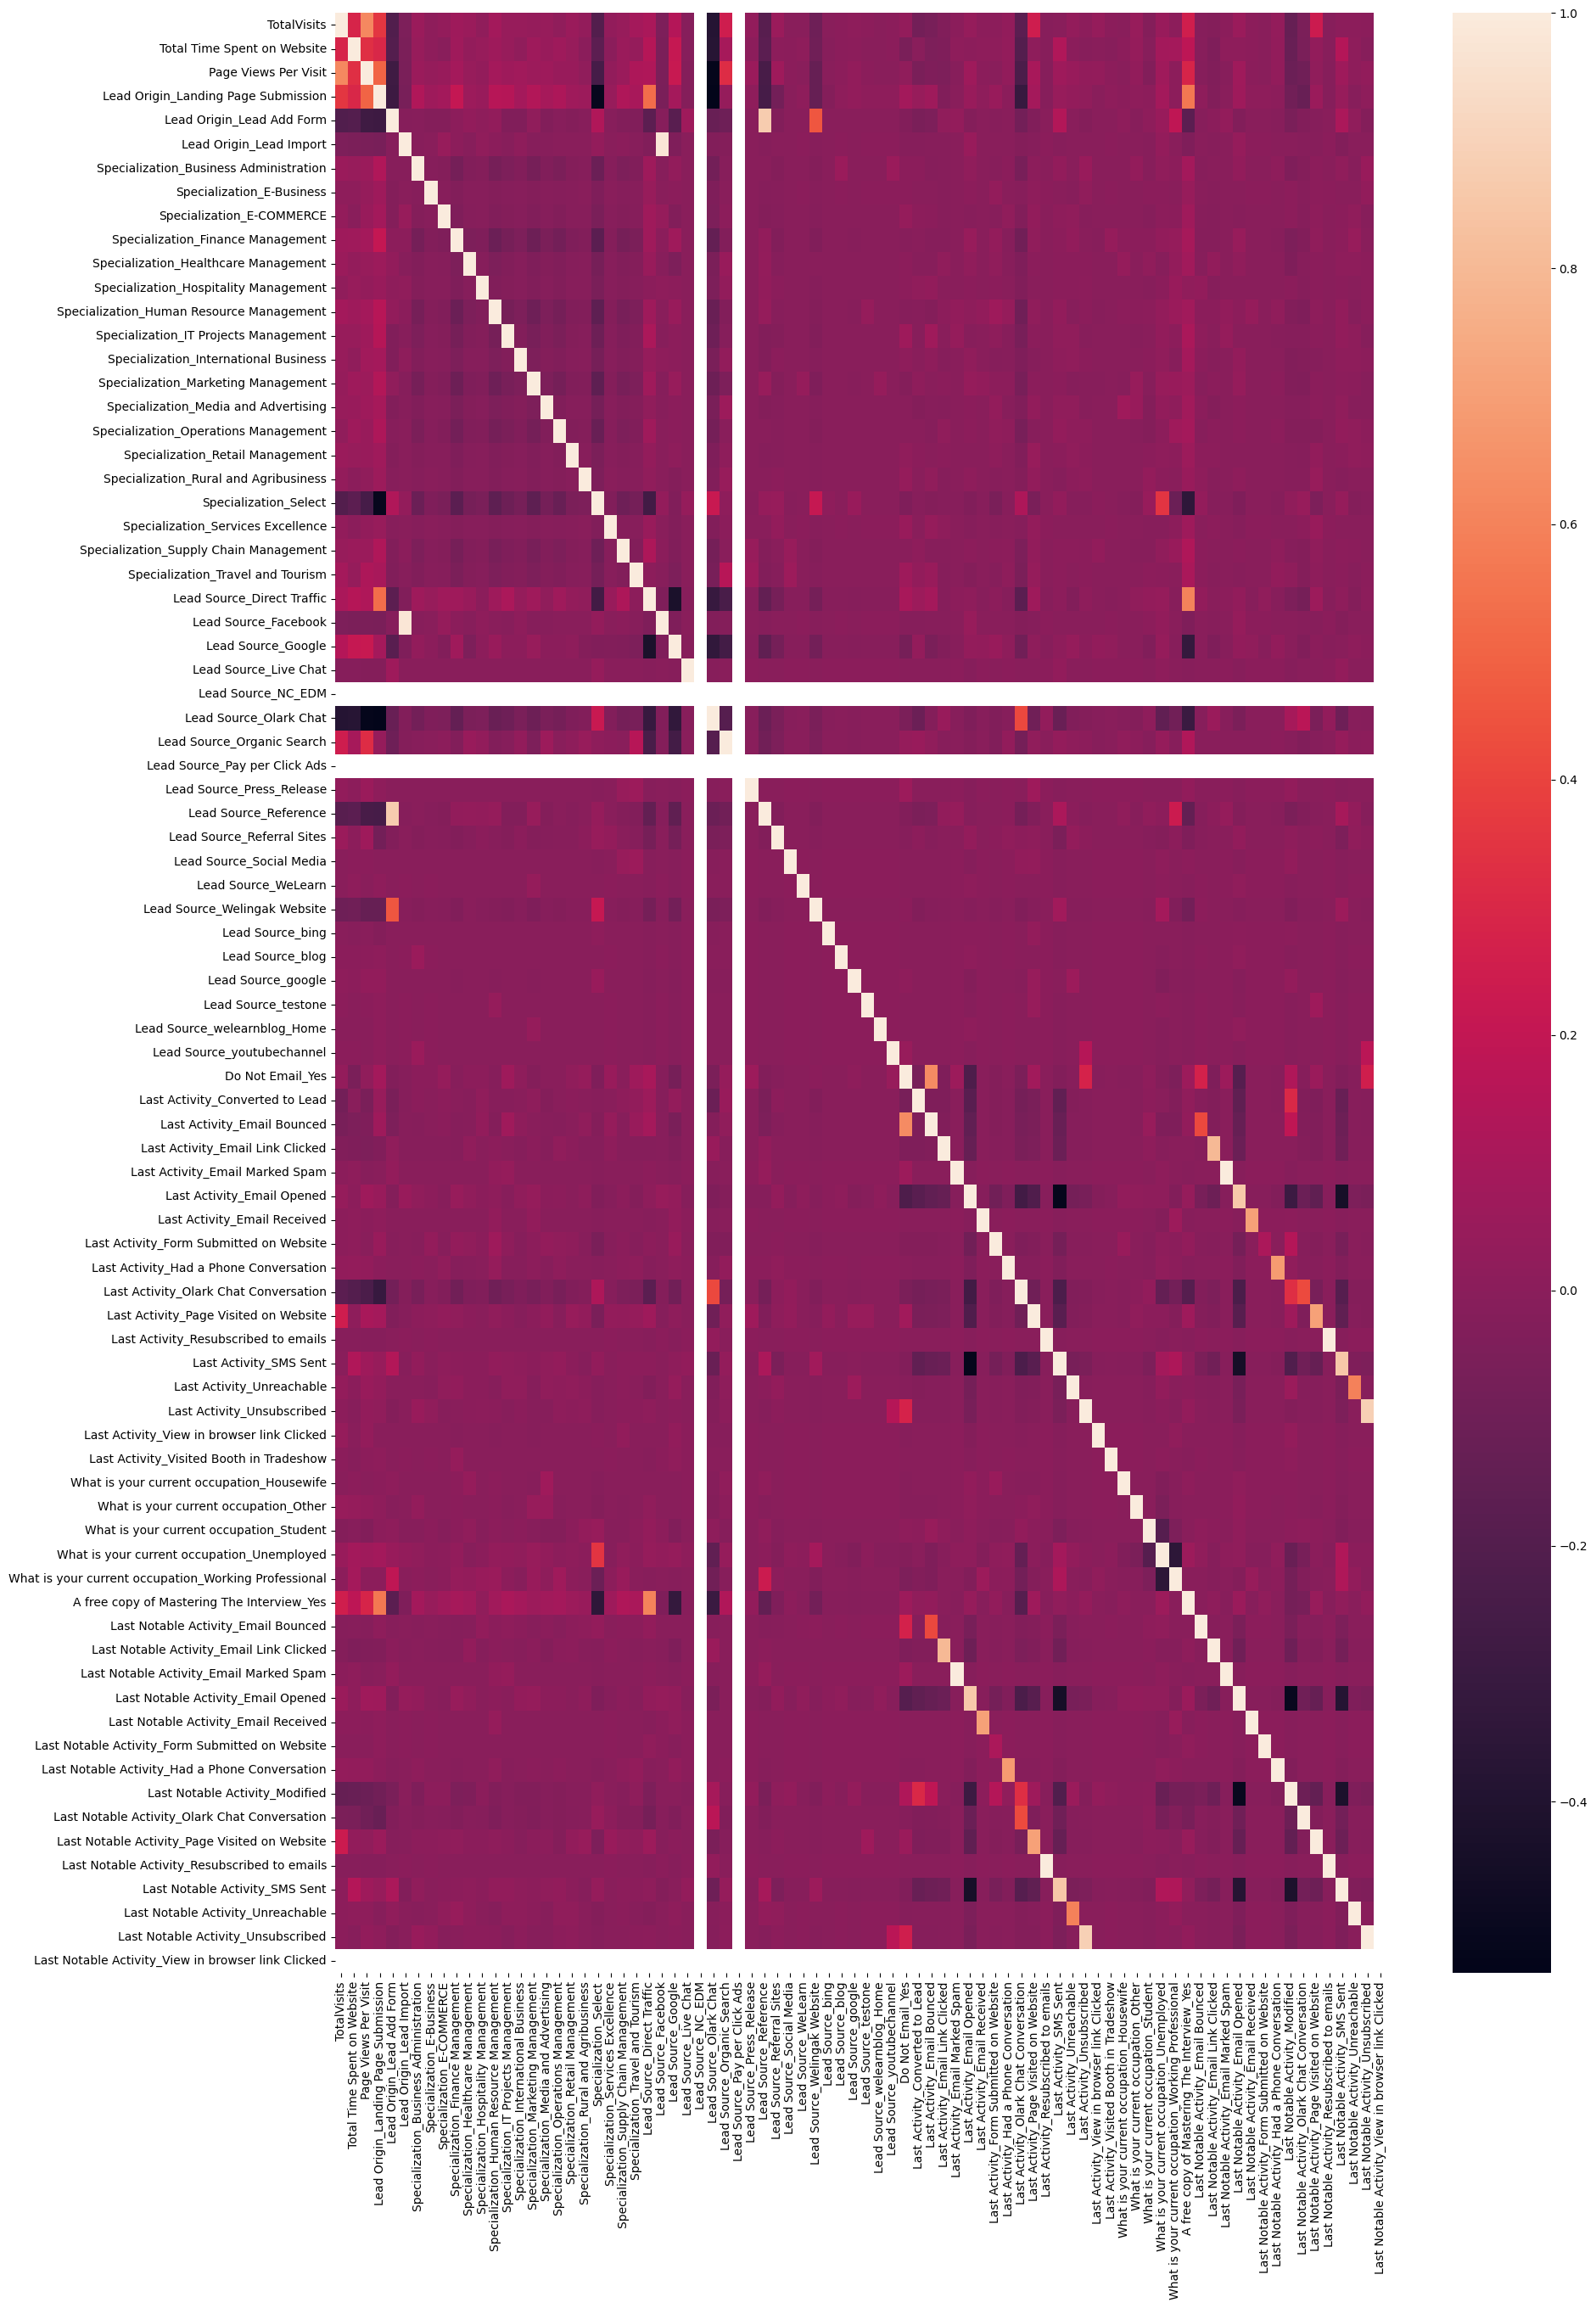

In [46]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [47]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
# Import RFE
from sklearn.feature_selection import RFE

In [49]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 13),
 ('Specialization_Human Resource Management', False, 44),
 ('Specialization_IT Projects Management', False, 40),
 ('Specialization_International Business', False, 53),
 ('Specialization_Marketing Management', False, 33),
 ('Specialization_Media and Advertising', False, 60),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 22),
 ('Specialization_Rural and Agribusiness', False, 34),
 ('Specialization_Sele

In [51]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [52]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [53]:
# Importing statsmodels
import statsmodels.api as sm

In [54]:
# Ensure X_train and y_train are numeric
X_train = X_train.astype(float)  # Convert X_train to float if necessary
y_train = y_train.astype(float)  # Convert y_train to float if necessary

# Add constant to X_train for intercept in GLM
X_train_sm = sm.add_constant(X_train)

# Initialize and fit the GLM model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 23 Jun 2024   Deviance:                       5270.1
Time:                        21:29:04   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [55]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


In [57]:
print(X_train.columns)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [58]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 23 Jun 2024   Deviance:                       5270.1
Time:                        21:29:18   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [59]:
X_train = X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1)

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [61]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [62]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Sun, 23 Jun 2024   Deviance:                       5302.6
Time:                        21:29:49   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [69]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [71]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.7
Date:                Sun, 23 Jun 2024   Deviance:                       5279.4
Time:                        11:59:06   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3954
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4681      0.113    -30.590      0.000      -3.690      -3.246
TotalVisits                                              5.6224      1.454      3.868      0.000       2.773       8.472
Total Time Spent on Website                              4.6340      0.167     27.752      0.000       4.307       4.961
Lead Origin_lead add form                                3.7504      0.225     16.641      0.000       3.309       4.192
Lead Source_olark chat                                   1.5930      0.112     14.257      0.000       1.374       1.812
Lead Source_welingak website                             2.5987      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4327      0.170     -8.409      0.000      -1.767      -1.099
Last Activity_olark chat conversation                   -1.3830      0.167     -8.263      0.000      -1.711      -1.055
Last Activity_sms sent                                   1.2775      0.074     17.274      0.000       1.133       1.422
What is your current occupation_housewife               25.3823   3.09e+04      0.001      0.999   -6.05e+04    6.05e+04
What is your current occupation_student                  1.2460      0.227      5.501      0.000       0.802       1.690
What is your current occupation_unemployed               1.1556      0.086     13.504      0.000       0.988       1.323
What is your current occupation_working professional     3.6807      0.204     18.001      0.000       3.280       4.081
Last Notable Activity_had a phone conversation          24.0050   2.17e+04      0.001      0.999   -4.25e+04    4.25e+04
Last Notable Activity_unreachable                        1.8254      0.601      3.036      0.002       0.647       3.004
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.29
1,Total Time Spent on Website,2.06
0,TotalVisits,1.84
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [74]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647128
3604    0.132958
5584    0.235432
7679    0.132958
7563    0.496371
7978    0.778556
7780    0.165385
7863    0.982649
838     0.771777
708     0.146990
dtype: float64

In [75]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64712845, 0.13295782, 0.23543217, 0.13295782, 0.4963712 ,
       0.77855649, 0.16538545, 0.9826491 , 0.77177685, 0.1469896 ])

In [76]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1.0,0.647128
1,0.0,0.132958
2,0.0,0.235432
3,0.0,0.132958
4,0.0,0.496371


In [77]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1.0,0.647128,1
1,0.0,0.132958,0
2,0.0,0.235432,0
3,0.0,0.132958,0
4,0.0,0.496371,0


## 7. Model Evaluation

In [78]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [79]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 746, 1710]], dtype=int64)

In [78]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [80]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8105810108644308

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [81]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [82]:
# Calculating the sensitivity
TP/(TP+FN)

0.6962540716612378

In [83]:
# Calculating the specificity
TN/(TN+FP)

0.8826700898587934

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [84]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

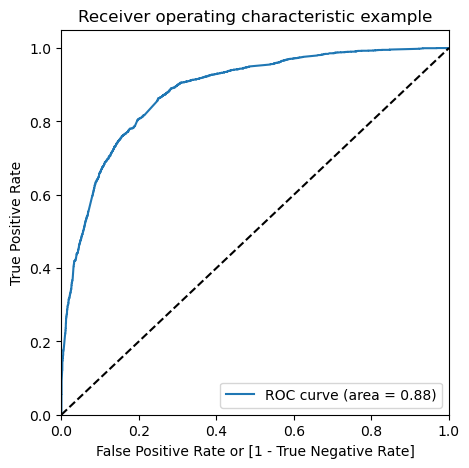

In [107]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.88 which is a very good value.___</font>

In [87]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.647128,1,1,1,1,1,1,1,1,0,0,0
1,0.0,0.132958,0,1,1,0,0,0,0,0,0,0,0
2,0.0,0.235432,0,1,1,1,0,0,0,0,0,0,0
3,0.0,0.132958,0,1,1,0,0,0,0,0,0,0,0
4,0.0,0.496371,0,1,1,1,1,1,0,0,0,0,0


In [88]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.579594,0.983306,0.325032
0.2,0.2,0.760825,0.914495,0.663928
0.3,0.3,0.789954,0.873779,0.737099
0.4,0.4,0.810424,0.765472,0.838768
0.5,0.5,0.810581,0.696254,0.882670
0.6,0.6,0.803496,0.629479,0.913222
0.7,0.7,0.774051,0.505700,0.943261
0.8,0.8,0.754684,0.416938,0.967651
0.9,0.9,0.708865,0.266287,0.987933


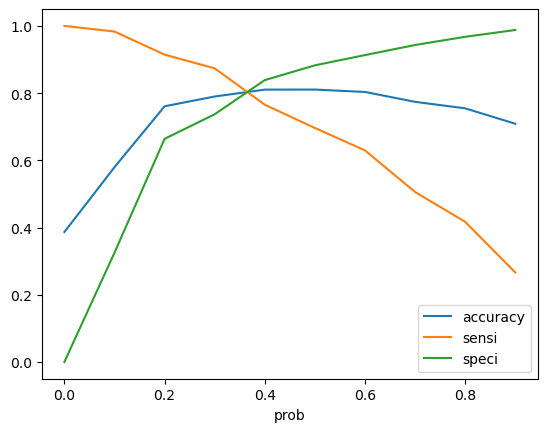

In [89]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.647128,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.132958,0,1,1,0,0,0,0,0,0,0,0,0
2,0.0,0.235432,0,1,1,1,0,0,0,0,0,0,0,0
3,0.0,0.132958,0,1,1,0,0,0,0,0,0,0,0,0
4,0.0,0.496371,0,1,1,1,1,1,0,0,0,0,0,1


In [91]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8042827901117934

In [92]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3130,  765],
       [ 478, 1978]], dtype=int64)

In [93]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:
# Calculating the sensitivity
TP/(TP+FN)

0.8041530944625407

In [94]:
# Calculating the specificity
TN/(TN+FP)

0.803594351732991

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [95]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
# Substituting all the columns in the final train model
col = X_train.columns

In [97]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,False,False,False,False,False,False,False,False,True,False,False,False
7212,1.0,0.028369,0.001320,False,False,False,False,False,True,False,False,False,True,False,False
2085,1.0,0.000000,0.000000,True,False,True,False,False,False,False,False,True,False,False,False
4048,1.0,0.028369,0.617077,False,False,False,False,False,True,False,False,True,False,False,False
4790,1.0,0.028369,0.005282,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,True,False,False,True,False,False,False,True,False,False,False
8179,1.0,0.170213,0.148768,False,False,False,False,False,True,False,False,False,False,False,False
6236,1.0,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False,False
5240,1.0,0.078014,0.458627,False,False,False,False,False,True,False,False,True,False,False,False


In [110]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [111]:
# Calculating the sensitivity
TP/(TP+FN)

0.8053745928338762

In [149]:
# Calculating the specificity
TN/(TN+FP)

0.8025673940949936

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 9. Precision-Recall

In [150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [151]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7889145496535797

In [152]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6954397394136808

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

In [154]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6346    0.0
 6347    0.0
 6348    0.0
 6349    0.0
 6350    1.0
 Name: Converted, Length: 6351, dtype: float64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

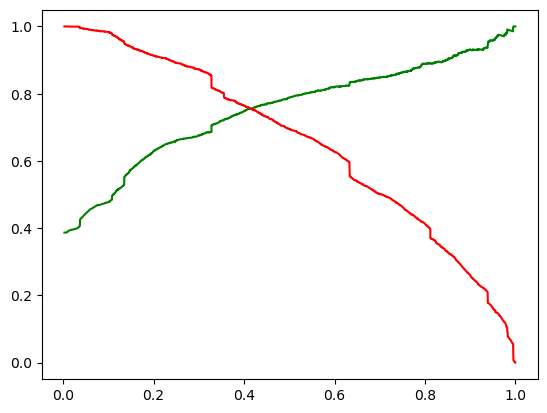

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0.0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0.0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0.0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [158]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [159]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  606],
       [ 593, 1863]], dtype=int64)

In [160]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [161]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7545565006075334

In [162]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

<font color= green>___With the current cut off as 0.41 we have Precision around 75% and Recall around 75%___</font>

## 10. Prediction on Test set

In [167]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [168]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7545565006075334

In [169]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

<font color= green>___With the current cut off as 0.41 we have Precision around 75% and Recall around 75%___</font>